In [6]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras import losses

In [7]:
encoding_dim = 32

In [8]:
input_img = Input(shape=(784,))

In [9]:
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-8))(input_img)

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
decoded = Dense(784,activation='sigmoid')(encoded)

In [11]:
autoencoder = Model(input_img,decoded)

In [12]:
from keras.datasets import mnist
import numpy as np

In [13]:
encoder = Model(input_img,encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input,decoder_layer(encoded_input))

In [14]:
autoencoder.compile(optimizer='adadelta',loss=losses.binary_crossentropy)

In [15]:
(x_train,_),(x_test,_) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

In [20]:
np.prod(x_train.shape[1:])

784

In [21]:
x_test.shape

(10000, 784)

In [22]:
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True
                ,validation_data=(x_test,x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.3578 - val_loss: 0.2730
Epoch 2/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.2656 - val_loss: 0.2547
Epoch 3/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.2454 - val_loss: 0.2341
Epoch 4/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2274 - val_loss: 0.2180
Epoch 5/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.2134 - val_loss: 0.2061
Epoch 6/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.2027 - val_loss: 0.1966
Epoch 7/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.1941 - val_loss: 0.1888
Epoch 8/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1870 - val_loss: 0.1823
Epoch 9/50
60000/60000 [==============================] - 1s 2

In [23]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

array([[2.4873018e-04, 3.5464764e-04, 2.0286441e-04, ..., 1.5825033e-05,
        1.6820431e-04, 2.5391579e-05],
       [3.8266182e-05, 3.9041042e-05, 3.8921833e-05, ..., 1.4394522e-05,
        1.1327863e-04, 2.6494265e-05],
       [2.5385618e-04, 2.3332238e-04, 3.7986040e-04, ..., 6.4828992e-04,
        2.7948618e-04, 4.0268898e-04],
       ...,
       [7.7486038e-07, 7.7486038e-07, 2.9802322e-07, ..., 2.6822090e-07,
        1.7881393e-07, 8.9406967e-08],
       [1.7493963e-05, 4.1723251e-06, 4.8279762e-06, ..., 2.0563602e-06,
        7.3909760e-06, 3.1292439e-06],
       [8.9406967e-08, 1.1920929e-07, 1.1920929e-07, ..., 1.7881393e-07,
        3.5762787e-07, 8.9406967e-08]], dtype=float32)

In [40]:
import matplotlib.pyplot as plt

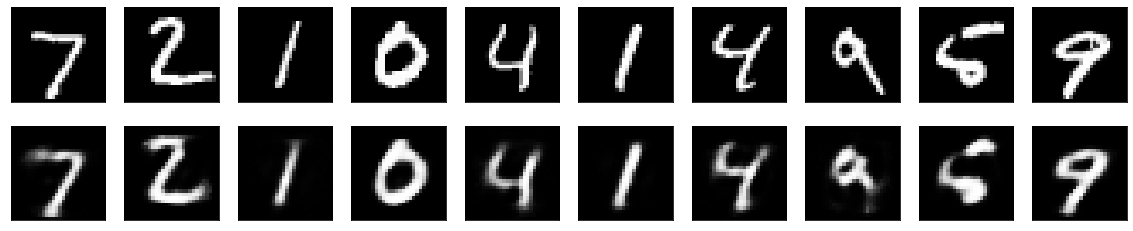

In [41]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
autoencoder.pre